In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
inv = jnp.linalg.inv

In [3]:
import numpy as np

In [4]:
N_d = 10_000

sigma_n = 1.
sigma_p = 100.

x = jnp.arange(1, 11)

N_p = len(x)

R = np.random.random((N_d, N_p))

def f(x, R):
    return R @ x

y = f(x, R)

y_obs = y + sigma_n * np.random.randn(N_d)

In [5]:
R.shape, x.shape, y.shape

((10000, 10), (10,), (10000,))

In [6]:
mu_p = jnp.zeros(N_p)
Sigma_p = sigma_p**2 *jnp.eye(N_p)

Sigma_n = sigma_n**2 * jnp.eye(N_d)

# True Posterior (Analytic)

In [7]:
Sigma = inv(R.T @ inv(Sigma_n) @ R + inv(Sigma_p))
std = jnp.sqrt(jnp.diag(Sigma))
mu = Sigma @ (R.T @ inv(Sigma_n) @ y_obs + inv(Sigma_p) @ mu_p)

In [8]:
mu, std

(Array([0.9610901, 2.0702248, 3.0026512, 3.9817543, 4.9542046, 5.9995003,
        6.991846 , 8.050571 , 9.022598 , 9.984528 ], dtype=float32),
 Array([0.03291197, 0.03310943, 0.03286497, 0.0328835 , 0.03327547,
        0.03276751, 0.03275217, 0.03309136, 0.03291466, 0.03308905],      dtype=float32))

In [9]:
Sigma

Array([[ 1.3326281e-03,  3.1584416e-06,  1.5988500e-06, ...,
         1.4450820e-06,  2.3184894e-05, -4.3373610e-05],
       [ 3.1598570e-06,  1.3265763e-03,  4.3149916e-07, ...,
         1.0955476e-06,  1.6252981e-06,  6.4861260e-06],
       [ 1.5994734e-06,  4.3035891e-07,  1.3313654e-03, ...,
         3.0357660e-06,  1.5322155e-05,  7.7962013e-06],
       ...,
       [ 1.4434626e-06,  1.0947055e-06,  3.0352364e-06, ...,
         1.3566030e-03,  1.1102044e-05, -2.3801991e-05],
       [ 2.3185879e-05,  1.6256436e-06,  1.5322243e-05, ...,
         1.1103694e-05,  1.3431165e-03, -1.1590180e-05],
       [-4.3373668e-05,  6.4854012e-06,  7.7949753e-06, ...,
        -2.3803739e-05, -1.1589455e-05,  1.3248749e-03]], dtype=float32)

In [10]:
x_pos = jnp.linalg.cholesky(Sigma) @ np.random.randn(N_p, 10_000) + mu[:,None]

In [11]:
mu[0]

Array(-0.4296875, dtype=float32)

In [12]:
x_pos.shape

(1000, 10000)

Text(0, 0.5, 'X[1]')

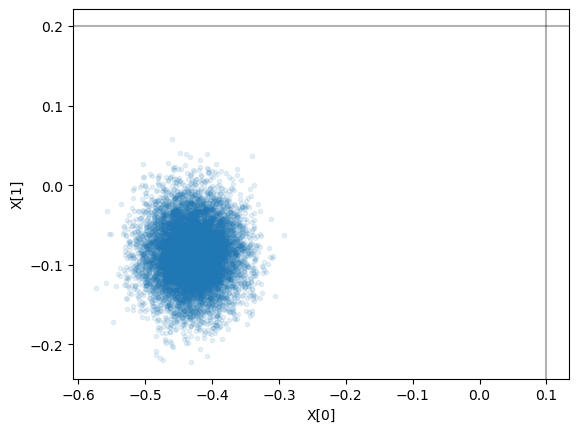

In [13]:
plt.plot(x_pos[0], x_pos[1], '.', alpha=0.1)
plt.axvline(x[0], color='k', alpha=0.3)
plt.axhline(x[1], color='k', alpha=0.3)
plt.xlabel("X[0]")
plt.ylabel("X[1]")

# Sampling using posterior mean and linear perturbations (Full Memory, Compute)

In [14]:
N_s = 10_000

mu_p_ = jnp.linalg.cholesky(Sigma_p) @ np.random.randn(N_p, N_s) + mu_p[:,None]
y_obs_ = sigma_n * np.random.randn(N_d, N_s) + y_obs[:,None]

In [15]:
mu_ = Sigma @ (R.T @ inv(Sigma_n) @ y_obs_ + inv(Sigma_p) @ mu_p_)

In [16]:
dmu_ = Sigma @ (R.T @ inv(Sigma_n) @ (y_obs_-y_obs[:,None]) + inv(Sigma_p) @ (mu_p_-mu_p[:,None]))

Text(0, 0.5, 'X[1]')

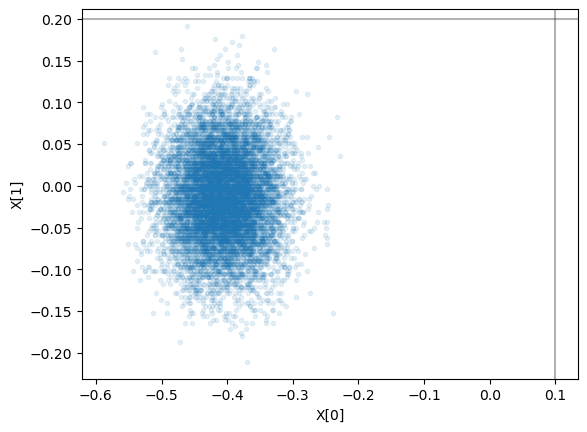

In [17]:
plt.plot(mu_[0], mu_[1], '.', alpha=0.1)
plt.axvline(x[0], color='k', alpha=0.3)
plt.axhline(x[1], color='k', alpha=0.3)
plt.xlabel("X[0]")
plt.ylabel("X[1]")

In [18]:
Sigma

Array([[ 1.3326281e-03,  3.1584416e-06,  1.5988500e-06, ...,
         1.4450820e-06,  2.3184894e-05, -4.3373610e-05],
       [ 3.1598570e-06,  1.3265763e-03,  4.3149916e-07, ...,
         1.0955476e-06,  1.6252981e-06,  6.4861260e-06],
       [ 1.5994734e-06,  4.3035891e-07,  1.3313654e-03, ...,
         3.0357660e-06,  1.5322155e-05,  7.7962013e-06],
       ...,
       [ 1.4434626e-06,  1.0947055e-06,  3.0352364e-06, ...,
         1.3566030e-03,  1.1102044e-05, -2.3801991e-05],
       [ 2.3185879e-05,  1.6256436e-06,  1.5322243e-05, ...,
         1.1103694e-05,  1.3431165e-03, -1.1590180e-05],
       [-4.3373668e-05,  6.4854012e-06,  7.7949753e-06, ...,
        -2.3803739e-05, -1.1589455e-05,  1.3248749e-03]], dtype=float32)

In [19]:
jnp.cov(mu_)

Array([[ 2.1489600e-03, -1.3954959e-05, -1.1995684e-05, ...,
         2.8332952e-06,  4.9343995e-05, -3.0073577e-05],
       [-1.3954959e-05,  2.7881199e-03, -2.1473078e-04, ...,
         5.7171823e-05,  2.7096165e-05,  2.5893742e-04],
       [-1.1995684e-05, -2.1473078e-04,  2.5772762e-03, ...,
         1.4396239e-05,  1.7010452e-05, -1.2453746e-04],
       ...,
       [ 2.8332952e-06,  5.7171823e-05,  1.4396239e-05, ...,
         1.9317624e-03,  3.1569922e-05, -5.1829857e-06],
       [ 4.9343995e-05,  2.7096165e-05,  1.7010452e-05, ...,
         3.1569922e-05,  1.9128240e-03,  3.7065482e-05],
       [-3.0073577e-05,  2.5893742e-04, -1.2453746e-04, ...,
        -5.1829857e-06,  3.7065482e-05,  2.0214492e-03]], dtype=float32)

In [20]:
jnp.cov(dmu_)

Array([[ 1.2861140e-03, -9.9414376e-07,  1.7711234e-05, ...,
         6.3728066e-06,  2.0168392e-05, -4.3713226e-05],
       [-9.9414376e-07,  1.3322819e-03,  1.7567188e-05, ...,
         1.2356768e-05,  8.2674605e-06,  3.0110030e-05],
       [ 1.7711234e-05,  1.7567188e-05,  1.3240642e-03, ...,
         2.2426633e-05,  1.1476022e-05, -4.1510002e-06],
       ...,
       [ 6.3728066e-06,  1.2356768e-05,  2.2426633e-05, ...,
         1.3205137e-03,  3.0614236e-05, -2.9058687e-05],
       [ 2.0168392e-05,  8.2674605e-06,  1.1476022e-05, ...,
         3.0614236e-05,  1.3666225e-03, -1.6149884e-06],
       [-4.3713226e-05,  3.0110030e-05, -4.1510002e-06, ...,
        -2.9058687e-05, -1.6149884e-06,  1.3309111e-03]], dtype=float32)

In [9]:
from jax import jvp, vjp, jit, vmap

In [10]:
_, vjp_fun = vjp(lambda x: f(x, R), mu)

In [11]:
vjp_fun(y_obs)[0]

Array([137581.23, 138203.92, 139426.42, 140968.38, 141704.02, 143650.84,
       142133.28, 143200.94, 145479.19, 145743.97], dtype=float32)

In [12]:
@jit
def vjp_(x, y):
    _, vjp_fun = vjp(lambda x: f(x, R), mu)
    return vjp_fun(y)[0]

In [13]:
vjp_(mu, y_obs)

Array([137581.53, 138204.02, 139426.38, 140968.58, 141704.12, 143650.84,
       142133.33, 143200.58, 145479.23, 145744.  ], dtype=float32)

In [14]:
@jit
def jvp_(x, v):
    return jvp(lambda x: f(x, R), (x,), (v,))[1]

In [15]:
jvp_(mu, mu).shape

(10000,)

In [16]:
vmap(jvp_, in_axes=(None,1))(mu, dmu_).shape

NameError: name 'dmu_' is not defined

In [19]:
@jit
def fvp(x, v):
    pushforward = jvp(lambda x: f(x, R), (x,), (v,))[1]
    _, vjp_fun = vjp(lambda x: f(x, R), x)
    return vjp_fun(pushforward)[0]

In [20]:
@jit
def post_fvp(x, v, prior_precision):
    return fvp(x, v) + prior_precision @ v

In [21]:
jnp.linalg.inv(vmap(fvp, in_axes=(None, 0))(mu, jnp.eye(N_p)))

Array([[ 1.08319789e-03, -1.41994635e-04, -9.52963455e-05,
        -1.21214798e-04, -1.03590493e-04, -1.01612430e-04,
        -1.15294526e-04, -1.23260223e-04, -1.09023393e-04,
        -1.29636435e-04],
       [-1.41994780e-04,  1.09623407e-03, -1.23238671e-04,
        -1.10565234e-04, -1.08278720e-04, -1.25047227e-04,
        -1.27541251e-04, -1.12447393e-04, -9.09336450e-05,
        -1.12271497e-04],
       [-9.52962146e-05, -1.23238744e-04,  1.08010590e-03,
        -1.14230839e-04, -1.26951578e-04, -1.10130721e-04,
        -1.25581762e-04, -1.15272793e-04, -1.21786492e-04,
        -1.06095125e-04],
       [-1.21214878e-04, -1.10565270e-04, -1.14231021e-04,
         1.08132465e-03, -1.18819851e-04, -1.06030573e-04,
        -1.16555217e-04, -1.15555325e-04, -1.26982297e-04,
        -1.16031079e-04],
       [-1.03590472e-04, -1.08278677e-04, -1.26951534e-04,
        -1.18819939e-04,  1.10725674e-03, -1.28909800e-04,
        -1.24410130e-04, -1.16753741e-04, -1.24132173e-04,
        -1.

In [32]:
jnp.linalg.inv(vmap(post_fvp, in_axes=(None, 0, None))(mu, jnp.eye(N_p), jnp.eye(N_p)))

Array([[ 1.3306618e-03,  3.1528027e-06,  1.5981572e-06, ...,
         1.4332345e-06,  2.3113609e-05, -4.3250977e-05],
       [ 3.1524723e-06,  1.3246186e-03,  4.3017633e-07, ...,
         1.1036605e-06,  1.6197724e-06,  6.4714254e-06],
       [ 1.5992952e-06,  4.2998323e-07,  1.3293951e-03, ...,
         3.0213223e-06,  1.5285312e-05,  7.7757131e-06],
       ...,
       [ 1.4325382e-06,  1.1034289e-06,  3.0209983e-06, ...,
         1.3545424e-03,  1.1044902e-05, -2.3719196e-05],
       [ 2.3113005e-05,  1.6188653e-06,  1.5286461e-05, ...,
         1.1048539e-05,  1.3411061e-03, -1.1547853e-05],
       [-4.3251701e-05,  6.4713936e-06,  7.7759678e-06, ...,
        -2.3719704e-05, -1.1550190e-05,  1.3229250e-03]], dtype=float32)

In [33]:
from jax.scipy.sparse.linalg import cg

In [34]:
@jit
def inv_post_fvp(x, v):
    return cg(lambda v: post_fvp(x, v, jnp.eye(N_p)), v)[0]

In [35]:
vmap(lambda v: inv_post_fvp(mu, v))(jnp.eye(N_p))

Array([[ 1.3306605e-03,  3.1525901e-06,  1.5998660e-06, ...,
         1.4332212e-06,  2.3112736e-05, -4.3251261e-05],
       [ 3.1523603e-06,  1.3246179e-03,  4.3006872e-07, ...,
         1.1024225e-06,  1.6206008e-06,  6.4698374e-06],
       [ 1.6002090e-06,  4.2995626e-07,  1.3293953e-03, ...,
         3.0219069e-06,  1.5286529e-05,  7.7781342e-06],
       ...,
       [ 1.4333223e-06,  1.1023709e-06,  3.0219035e-06, ...,
         1.3545451e-03,  1.1051359e-05, -2.3720389e-05],
       [ 2.3112807e-05,  1.6201944e-06,  1.5286862e-05, ...,
         1.1051365e-05,  1.3411038e-03, -1.1547258e-05],
       [-4.3251297e-05,  6.4701517e-06,  7.7772111e-06, ...,
        -2.3720359e-05, -1.1547399e-05,  1.3229292e-03]], dtype=float32)

In [36]:
@jit
def post_cov_samples(x, l_samples, l_noise, p_samples, p_noise):
    samples = vmap(lambda y: vjp_(x, y))(l_samples/l_noise**2) + p_samples/p_noise**2
    return vmap(lambda v: inv_post_fvp(x, v))(samples)

In [37]:
p_samples = (jnp.linalg.cholesky(Sigma_p) @ np.random.randn(N_p, N_s)).T
l_samples = sigma_n * np.random.randn(N_s, N_d)

In [38]:
dmu__ = post_cov_samples(mu, l_samples, sigma_n, p_samples, 1.0).T

In [39]:
jnp.cov(dmu__)

Array([[ 2.1100206e-02, -1.9160975e-04,  2.9051147e-04, ...,
         3.0884030e-04,  1.2970807e-03, -1.3497181e-03],
       [-1.9160975e-04,  2.1036204e-02,  1.3246399e-04, ...,
         9.1190059e-06,  3.5000648e-04,  2.8987703e-05],
       [ 2.9051147e-04,  1.3246399e-04,  2.0818694e-02, ...,
        -2.4147022e-04,  2.4545999e-04,  1.3037142e-04],
       ...,
       [ 3.0884030e-04,  9.1190059e-06, -2.4147022e-04, ...,
         2.1764293e-02,  2.9174547e-04, -8.4323838e-04],
       [ 1.2970807e-03,  3.5000648e-04,  2.4545999e-04, ...,
         2.9174547e-04,  2.1377012e-02, -3.6318388e-04],
       [-1.3497181e-03,  2.8987703e-05,  1.3037142e-04, ...,
        -8.4323838e-04, -3.6318388e-04,  2.0942047e-02]], dtype=float32)

Text(0, 0.5, 'X[1]')

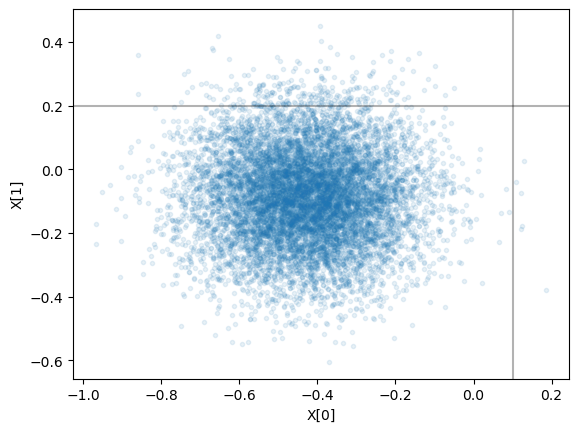

In [40]:
plt.plot(mu[0]+dmu__[0], mu[1]+dmu__[1], '.', alpha=0.1)
plt.axvline(x[0], color='k', alpha=0.3)
plt.axhline(x[1], color='k', alpha=0.3)
plt.xlabel("X[0]")
plt.ylabel("X[1]")

Text(0, 0.5, 'X[1]')

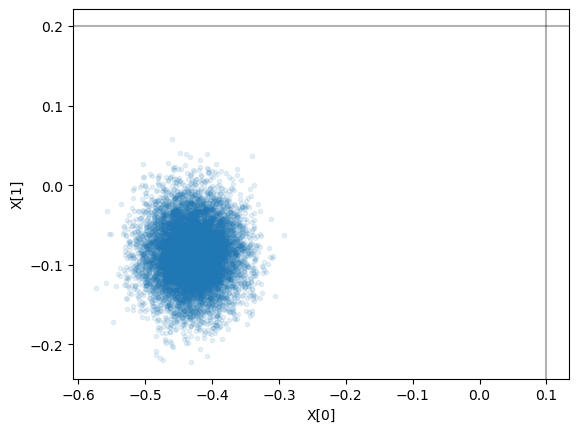

In [13]:
plt.plot(x_pos[0], x_pos[1], '.', alpha=0.1)
plt.axvline(x[0], color='k', alpha=0.3)
plt.axhline(x[1], color='k', alpha=0.3)
plt.xlabel("X[0]")
plt.ylabel("X[1]")

Text(0, 0.5, 'X[1]')

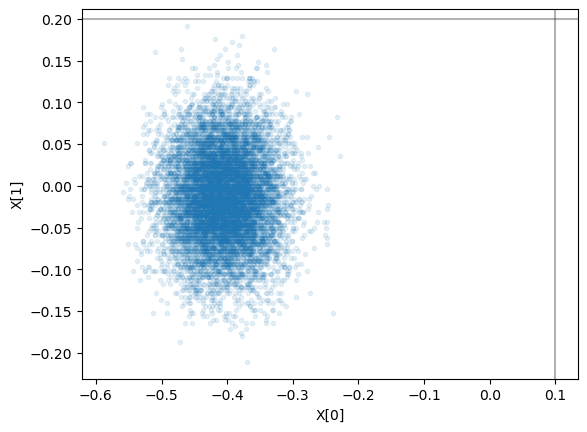

In [17]:
plt.plot(mu_[0], mu_[1], '.', alpha=0.1)
plt.axvline(x[0], color='k', alpha=0.3)
plt.axhline(x[1], color='k', alpha=0.3)
plt.xlabel("X[0]")
plt.ylabel("X[1]")